## IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower
import matplotlib as mpl

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from pandas.plotting import parallel_coordinates

## LOAD DATASET

In [ ]:
df = pd.read_csv('/content/ikea.csv')

In [ ]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


**DATAFRAME EXPLANATION**
<br>

|       Column       |       Explanation       |
|--------------------|-------------------------|
|  `item_id`   | Item identification number  |
|  `name`       | The name of the product |
|  `category`      | The category of the product |
|  `price` | The price of the product [$] |
|  `old_price`     | The old price of the product [No old price/ SR 995 / Other |
|  `sellable_online`  | Whether or not the IKEA product is sellable online [True/False] |
| `link`     | A link to IKEA product [link] |
|  `other_colors`    | Other colors that the IKEA product is available in [Yes/No] |
|  `short_description` | A short description of the IKEA product |
|  `designer`   | The designer of the IKEA productd |
|  `depth` | The depth of the IKEA product |
|  `height`  | The height of the IKEA product |
| `width` | The width of the IKEA product |

## DATA PREPOCESSING - EXPLORATORY DATA ANALYSIS [EDA]


### Data Cleaning

There is one column `Unnamed: 0` that doesn't represent anything, kind of redundancy with the **index**, so we can drop it. We also need to check is there any null and duplicated values.

In [ ]:
# drop unused column

df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
# Count null values

df.isna().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [ ]:
# Check if there any duplicated values

df.duplicated().sum()

0

In [ ]:
# Check Rows and Columns with null values

df[df[df.columns].isnull().any(1)]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
7,60155602,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0
9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0


As we can see the null values come from the dimension columns with different amount of null. We can fill it in with median value for each dimension from the same product category.

In [ ]:
# Count the median value for depth for each categories

median_depth = df.groupby(['category'])['depth'].median().reset_index()
median_depth.columns = ['category', 'MedianDepth']
median_depth

,category,MedianDepth
0,Bar furniture,47.0
1,Beds,88.0
2,Bookcases & shelving units,36.0
3,Cabinets & cupboards,38.0
4,Café furniture,46.5
5,Chairs,53.5
6,Chests of drawers & drawer units,47.0
7,Children's furniture,45.0
8,Nursery furniture,44.0
9,Outdoor furniture,67.0


In [ ]:
# Count the median value for height for each categories

median_height = df.groupby(['category'])['height'].median().reset_index()
median_height.columns = ['category', 'MedianHeight']
median_height

,category,MedianHeight
0,Bar furniture,102.0
1,Beds,84.0
2,Bookcases & shelving units,147.0
3,Cabinets & cupboards,101.0
4,Café furniture,77.5
5,Chairs,77.0
6,Chests of drawers & drawer units,73.0
7,Children's furniture,67.0
8,Nursery furniture,86.5
9,Outdoor furniture,73.0


In [ ]:
# Count the median value for width for each categories

median_width = df.groupby(['category'])['width'].median().reset_index()
median_width.columns = ['category', 'MedianWidth']
median_width

,category,MedianWidth
0,Bar furniture,48.0
1,Beds,140.0
2,Bookcases & shelving units,81.0
3,Cabinets & cupboards,80.0
4,Café furniture,53.0
5,Chairs,67.0
6,Chests of drawers & drawer units,67.0
7,Children's furniture,56.0
8,Nursery furniture,60.0
9,Outdoor furniture,62.5


In [ ]:
# Create new dataframe that contain the median for each dimensions, from each categories

median_size = pd.merge(pd.merge(median_depth,median_height,on='category'),median_width,on='category')
median_size

,category,MedianDepth,MedianHeight,MedianWidth
0,Bar furniture,47.0,102.0,48.0
1,Beds,88.0,84.0,140.0
2,Bookcases & shelving units,36.0,147.0,81.0
3,Cabinets & cupboards,38.0,101.0,80.0
4,Café furniture,46.5,77.5,53.0
5,Chairs,53.5,77.0,67.0
6,Chests of drawers & drawer units,47.0,73.0,67.0
7,Children's furniture,45.0,67.0,56.0
8,Nursery furniture,44.0,86.5,60.0
9,Outdoor furniture,67.0,73.0,62.5


In [ ]:
# Merge the median dataframe with existing dataframe

df = pd.merge(df,median_size,on='category')
df

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,MedianDepth,MedianHeight,MedianWidth
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,47.0,102.0,48.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,47.0,102.0,48.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,47.0,102.0,48.0
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,47.0,102.0,48.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,47.0,102.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0,57.0,236.0,150.0
3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0,57.0,236.0,150.0
3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0,57.0,236.0,150.0
3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0,57.0,236.0,150.0


In [ ]:
# Fill the null values in depth column, with the median value of depth

df['depth'] = df['depth'].fillna(df['MedianDepth'])

In [ ]:
# Fill the null values in height column, with the median value of height

df['height'] = df['height'].fillna(df['MedianHeight'])

In [ ]:
# Fill the null values in width column, with the median value of width

df['width'] = df['width'].fillna(df['MedianWidth'])

In [ ]:
# Let's check it again!

df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
MedianDepth          0
MedianHeight         0
MedianWidth          0
dtype: int64

In [ ]:
# Drop the Median Columns

df.drop(['MedianDepth', 'MedianHeight', 'MedianWidth'], 
        axis= 'columns', inplace = True)

Now after we fill in all product dimensions, we can calculate the volume of product based on it size.

In [ ]:
# create new column volume
df['volume'] = df['depth'] * df['height'] * df['width']

In [ ]:
# Check the dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              3694 non-null   float64
 11  height             3694 non-null   float64
 12  width              3694 non-null   float64
 13  volume             3694 non-null   float64
dtypes: bool(1), float64(5), int64(1), object(7)
memory usage: 407.6+ KB


From above information, `old_price` has a wrong type of data, let's change it from **object / string** to **float**, so it can have the same data type as `price`.

In [ ]:
# Find out the value in old_price column

df['old_price'].values

array(['No old price', 'No old price', 'No old price', ..., 'SR 1,050',
       'SR 3,130', 'SR 1,535'], dtype=object)

There are 2 type of values from `old_price` column, **No old price** and the one that display product price with **SR 0,000**. If the row value = **No old price**, we can fill it with the `price` value with assumption that the product is a newly released so it won't have and `old_price`.

In [ ]:
# Create the fix_old_price function

def fix_old_price(df):
    
    # fill in price to old_price for No old price
    if df['old_price']  == 'No old price':
        return df['price']

    # remove SR and , from old_price
    elif df['old_price'][-4:] != 'pack':
        return float(str(df['old_price'])[3:].replace(',',''))
        
    else:
        return np.nan

# create new column price_diff, to help identified is there any different 
# between price with old_price
df['price_diff'] = (df['old_price'] != 'No old price').astype(int)

# apply the function
df['old_price'] = df.apply(fix_old_price, axis=1)
df[['price', 'old_price']].head()


,price,old_price
0,265.0,265.0
1,995.0,995.0
2,2095.0,2095.0
3,69.0,69.0
4,225.0,225.0


In [ ]:
# Re-check for null values

df.isna().sum()

item_id               0
name                  0
category              0
price                 0
old_price            10
sellable_online       0
link                  0
other_colors          0
short_description     0
designer              0
depth                 0
height                0
width                 0
volume                0
price_diff            0
dtype: int64

In [ ]:
# Fill the old_price column with null values with price

df['old_price'] = df['old_price'].fillna(df['price'])

In [ ]:
# Create column to calculate the different amount between price and old_price

df['diff_amount'] = df['old_price'] - df['price']

In [ ]:
# Check it again!

df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
volume               0
price_diff           0
diff_amount          0
dtype: int64

In [ ]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume,price_diff,diff_amount
0,90420332,FREKVENS,Bar furniture,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,99.0,51.0,237303.0,0,0.0
1,368814,NORDVIKEN,Bar furniture,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,47.0,105.0,80.0,394800.0,0,0.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,47.0,102.0,48.0,230112.0,0,0.0
3,80155205,STIG,Bar furniture,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,300000.0,0,0.0
4,30180504,NORBERG,Bar furniture,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,190920.0,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   float64
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              3694 non-null   float64
 11  height             3694 non-null   float64
 12  width              3694 non-null   float64
 13  volume             3694 non-null   float64
 14  price_diff         3694 non-null   int64  
 15  diff_amount        3694 non-null   float64
dtypes: bool(1), float64(7), 

### Correlation and Descriptive Statistic

In [ ]:
# correlation heatmap

df.corr()

,item_id,price,old_price,sellable_online,depth,height,width,volume,price_diff,diff_amount
item_id,1.000000,0.062683,0.063291,0.015255,0.013912,0.042289,0.047008,0.051491,0.040748,0.030468
price,0.062683,1.000000,0.993867,0.040226,0.435003,0.229950,0.602747,0.648516,0.095033,0.352013
old_price,0.063291,0.993867,1.000000,0.040119,0.441311,0.227645,0.608017,0.650187,0.160414,0.453362
sellable_online,0.015255,0.040226,0.040119,1.000000,0.039618,0.040584,0.064465,0.048055,0.024181,0.015348
depth,0.013912,0.435003,0.441311,0.039618,1.000000,-0.077826,0.460812,0.621798,0.090364,0.229094
height,0.042289,0.229950,0.227645,0.040584,-0.077826,1.000000,0.332318,0.482914,0.085591,0.073381
width,0.047008,0.602747,0.608017,0.064465,0.460812,0.332318,1.000000,0.827089,0.137429,0.288071
volume,0.051491,0.648516,0.650187,0.048055,0.621798,0.482914,0.827089,1.000000,0.112497,0.276094
price_diff,0.040748,0.095033,0.160414,0.024181,0.090364,0.085591,0.137429,0.112497,1.000000,0.591765
diff_amount,0.030468,0.352013,0.453362,0.015348,0.229094,0.073381,0.288071,0.276094,0.591765,1.000000


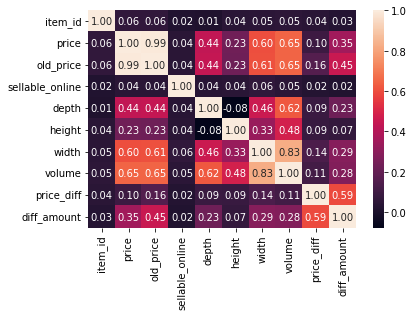

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

# (fig. 1)

`price` and `old_price` has higher correlation with `width` rather than two other dimension unit [ `depth` and `height` ], and both `price` and `old_price` are highly correlated with each others and obviously with `price_diff`. 

From three types of product dimension, `volume` has highest correlation with `width`, followed with `depth` then `height`. `volume` also correlated with `price` and `old_price`

We will drop some column that can create **multicolinearity**, later for modelling purposes.

In [ ]:
# Let's do Descriptive Statistics with the dataframe

df.describe()

,item_id,price,old_price,depth,height,width,volume,price_diff,diff_amount
count,3.694000e+03,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3.694000e+03,3694.000000,3694.000000
mean,4.863240e+07,1078.208419,1125.014348,55.880211,98.524228,105.420953,7.058127e+05,0.177044,46.805929
std,2.888709e+07,1374.652494,1443.543124,26.683012,55.201894,68.800229,9.146756e+05,0.381757,170.552565
min,5.848700e+04,3.000000,3.000000,1.000000,1.000000,1.000000,4.000000e+01,0.000000,0.000000
25%,2.039057e+07,180.900000,195.000000,40.000000,73.000000,60.000000,2.042400e+05,0.000000,0.000000
50%,4.928808e+07,544.700000,550.000000,46.500000,80.000000,80.000000,3.072000e+05,0.000000,0.000000
75%,7.040357e+07,1429.500000,1495.000000,65.000000,105.000000,141.000000,8.640000e+05,0.000000,0.000000
max,9.993262e+07,9585.000000,9985.000000,257.000000,700.000000,420.000000,1.362900e+07,1.000000,1997.000000


**Conclusion:**


1.   `price_diff` is boolean with [0] for not a no different between `price` and `old_price` or it is a new product, and [1] if the value between`price` and `old_price` is different.
2.   All the other variables are bigger than the median except `item_id`.



### Exploratory Data Analysis [ EDA ]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   float64
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              3694 non-null   float64
 11  height             3694 non-null   float64
 12  width              3694 non-null   float64
 13  volume             3694 non-null   float64
 14  price_diff         3694 non-null   int64  
 15  diff_amount        3694 non-null   float64
dtypes: bool(1), float64(7), 

In [ ]:
# creating numerical dataframe : df_numericals

df_numericals = df.drop(labels = ['name','category','link', 'other_colors', 
                                  'designer', 'sellable_online', 'short_description'], axis = 1)
df_numericals.head()

,item_id,price,old_price,depth,height,width,volume,price_diff,diff_amount
0,90420332,265.0,265.0,47.0,99.0,51.0,237303.0,0,0.0
1,368814,995.0,995.0,47.0,105.0,80.0,394800.0,0,0.0
2,9333523,2095.0,2095.0,47.0,102.0,48.0,230112.0,0,0.0
3,80155205,69.0,69.0,50.0,100.0,60.0,300000.0,0,0.0
4,30180504,225.0,225.0,60.0,43.0,74.0,190920.0,0,0.0


In [ ]:
# creating categorical dataframe : df_categoricals

df_categoricals = df.drop(labels = ['item_id','depth','height', 'width', 
                                    'volume', 'price_diff', 'price', 
                                    'old_price', 'diff_amount'], axis = 1)
df_categoricals.head()

,name,category,sellable_online,link,other_colors,short_description,designer
0,FREKVENS,Bar furniture,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen
1,NORDVIKEN,Bar furniture,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette
2,NORDVIKEN / NORDVIKEN,Bar furniture,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette
3,STIG,Bar furniture,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz
4,NORBERG,Bar furniture,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen


### Univariate Analysis

#### Visualizing the Distribution Plot for Each Dimensions and Price

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show(*args, **kw)>

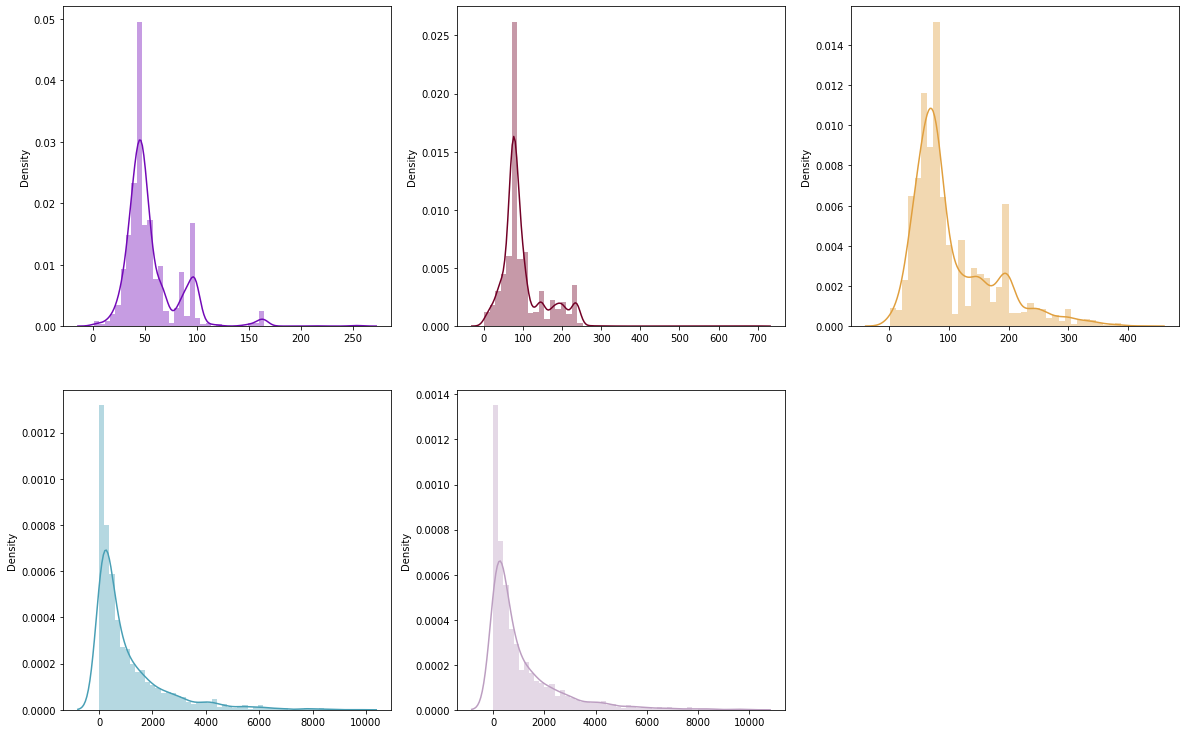

In [ ]:
# Visualize the distribution plot

plt.figure(figsize = (20,20))

plt.subplot(3, 3, 1)
sns.distplot(x=df_numericals['depth'], color='#7209b7')

plt.subplot(3, 3, 2)
sns.distplot(x=df_numericals['height'], color='#720026')

plt.subplot(3, 3, 3)
sns.distplot(x=df_numericals['width'], color='#e09f3e')

plt.subplot(3, 3, 4)
sns.distplot(x=df_numericals['price'], color='#489fb5')

plt.subplot(3, 3, 5)
sns.distplot(x=df_numericals['old_price'], color='#bc9ec1')

plt.show

# (fig. 2-6)

**Explanation:**

As we can see, from **fig. 2-6**, are skewed to the right, which means the **mean** is greater than the **median**, and dominated with product with lower price, and smaller size.

#### Proportion Between Online and Offline Sales

Here we try to analyze the proportion between online and offline sales.

In [ ]:
# count the value from sellable_online

df.sellable_online.value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

In [ ]:
# Create new dataframe df_online

df_online = pd.DataFrame({'Sellable Online': ['True', 'False'],
                          'Total': [3666, 28]})
df_online

,Sellable Online,Total
0,True,3666
1,False,28


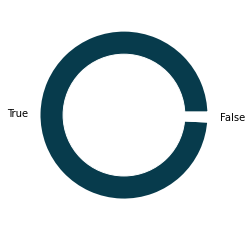

In [ ]:
# Visualizing the df_online dataframe with donut

# Define data
names = df_online['Sellable Online']
size = df_online['Total']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, colors=['#073b4c','#ffd166'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# (fig. 7)

#### Product With More Than 1 Color

In [ ]:
# count the value from other_colors

df.other_colors.value_counts()

No     2182
Yes    1512
Name: other_colors, dtype: int64

In [ ]:
# Create new dataframe df_color

df_color = pd.DataFrame({'other_colors': ['No', 'Yes'],
                          'Total': [2182, 1512]})
df_color

,other_colors,Total
0,No,2182
1,Yes,1512


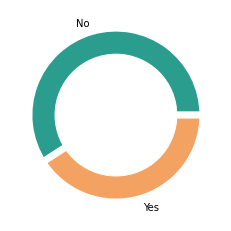

In [ ]:
# Define data
names = df_color['other_colors']
size = df_color['Total']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, colors=['#2a9d8f','#f4a261'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# (fig. 8)

#### Price Different Proportion

In [ ]:
# count the value of [Yes/No] from price_diff

df.price_diff.value_counts()

0    3040
1     654
Name: price_diff, dtype: int64

In [ ]:
# Create new dataframe df_price

df_price = pd.DataFrame({'Price Different': ['No', 'Yes'],
                          'Total': [3040, 654]})
df_price

,Price Different,Total
0,No,3040
1,Yes,654


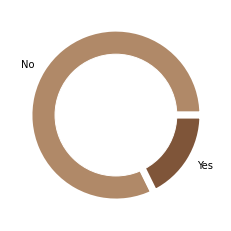

In [ ]:
# Define data
names = df_price['Price Different']
size = df_price['Total']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, colors=['#b08968','#7f5539'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# (fig. 9)

#### IKEA Product Categories 

In [ ]:
# Create new dataframe short the category

top_cat = (df_categoricals
            .groupby('category') 
            .agg(count=('category', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            )
top_cat

,category,count
14,Tables & desks,612
2,Bookcases & shelving units,548
5,Chairs,481
12,Sofas & armchairs,428
3,Cabinets & cupboards,292
16,Wardrobes,236
9,Outdoor furniture,216
1,Beds,208
13,TV & media furniture,190
6,Chests of drawers & drawer units,125


In [ ]:
# set the angle

ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(top_cat), endpoint=False)

In [ ]:
# define Sell

COUNT = top_cat['count'].values

In [ ]:
# define name

CAT = top_cat["category"].values

In [ ]:
# Prepare the graph (1)

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#84a98c","#52796f","#354f52","#2f3e46"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=COUNT.min(), vmax=COUNT.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(COUNT))

Text(0.5, 0.025, '(fig. 10) Data Visualisation of IKEA Product Categories')

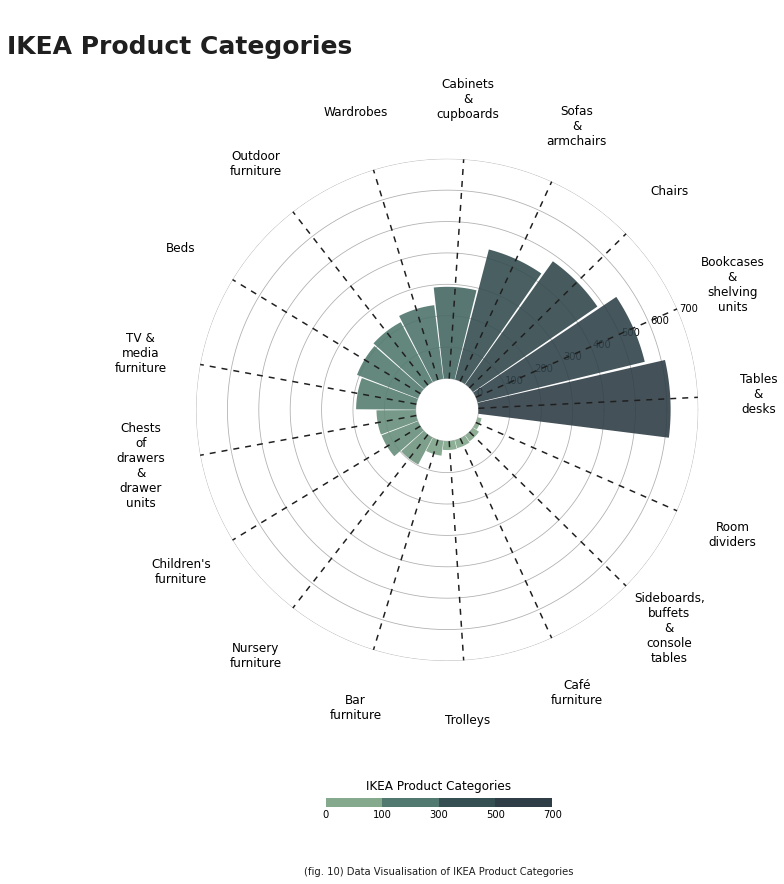

In [ ]:
# Prepare the graph (2) - Customize

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

#set axis
ax.set_ylim(-100, 700)

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.35, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

CAT = ["\n".join(wrap(r, 5, break_long_words=False)) for r in CAT]
CAT

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(CAT, size=12);

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add extra space for the labels
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(50)

# Add legend
# Add extra space for legend
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 100, 300, 500, 700]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[0, 100, 300, 500, 700]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("IKEA Product Categories", size=12, labelpad=-40)

# Add annotations 
# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.9)

# Define title, subtitle, and caption
title = "\nIKEA Product Categories"

caption = "(fig. 10) Data Visualisation of IKEA Product Categories"

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="center", va="baseline")
fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline")

#### IKEA Designer

In [ ]:
# Create new dataframe short the designer

top_des = (df_categoricals
            .groupby('designer') 
            .agg(count=('designer', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            .head(20)
            )
top_des

,designer,count
192,IKEA of Sweden,828
138,Ehlén Johansson,161
163,Francis Cayouette,151
344,Ola Wihlborg,134
279,K Hagberg/M Hagberg,122
270,Jon Karlsson,120
145,Ehlén Johansson/IKEA of Sweden,75
110,Carina Bengs,75
209,IKEA of Sweden/Ehlén Johansson,70
189,Henrik Preutz,70


In [ ]:
# set the angle

ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(top_des), endpoint=False)

In [ ]:
# define Sell

COUNT = top_des['count'].values

In [ ]:
# define name

DES = top_des["designer"].values

In [ ]:
# Prepare the graph (1)

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#f07167","#fed9b7","#fdfcdc","#0081a7"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=COUNT.min(), vmax=COUNT.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(COUNT))

Text(0.5, 0.025, '(fig. 11) Data Visualisation of IKEA Top Designers')

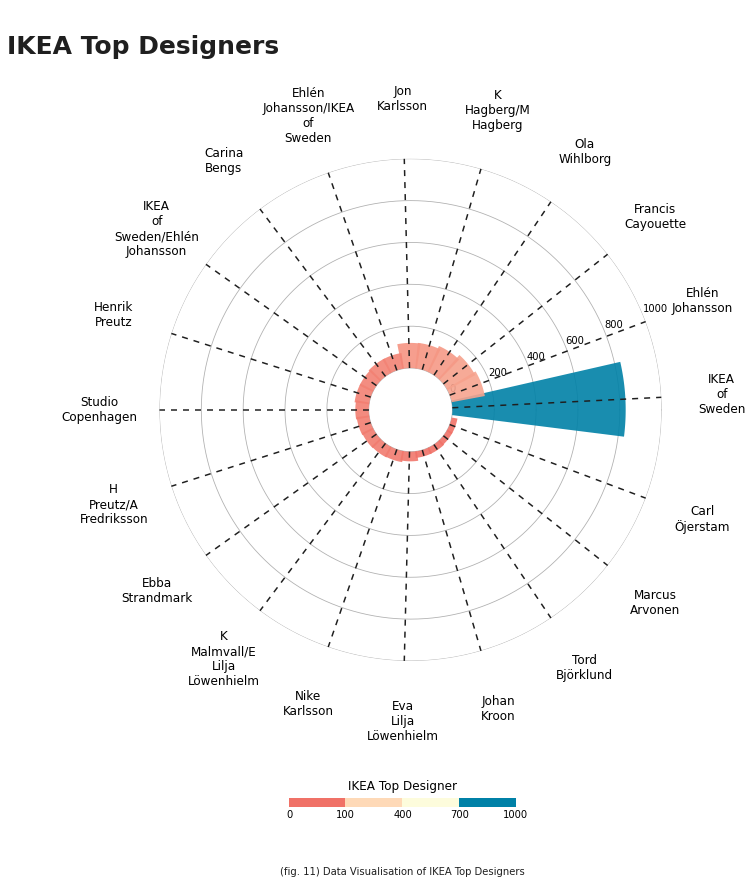

In [ ]:
# Prepare the graph (2) - Customize

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

#set axis
ax.set_ylim(-200, 1000)

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.35, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

DES = ["\n".join(wrap(r, 5, break_long_words=False)) for r in DES]
DES

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(DES, size=12);

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add extra space for the labels
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(50)

# Add legend
# Add extra space for legend
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 100, 400, 700, 1000]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[0, 100, 400, 700, 1000]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("IKEA Top Designer", size=12, labelpad=-40)

# Add annotations 
# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.9)

# Define title, subtitle, and caption
title = "\nIKEA Top Designers"

caption = "(fig. 11) Data Visualisation of IKEA Top Designers"

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="center", va="baseline")
fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline")

#### IKEA Best Seller

In [ ]:
# Create new dataframe short the designer

top_sel = (df_categoricals
            .groupby('name') 
            .agg(count=('name', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            .head(20)
            )
top_sel

,name,count
30,BESTÅ,173
412,PAX,111
163,GRÖNLID,83
22,BEKANT,74
545,TROFAST,74
216,IVAR,69
578,VIMLE,63
95,EKET,61
431,PLATSA,57
279,LIDHULT,52


In [ ]:
# set the angle

ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(top_sel), endpoint=False)

In [ ]:
# define Sell

COUNT = top_sel['count'].values

In [ ]:
# define name

SEL = top_sel["name"].values

In [ ]:
# Prepare the graph (1)

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#ff70a6","#ff9770","#ffd670","#70d6ff"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=COUNT.min(), vmax=COUNT.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(COUNT))

Text(0.5, 0.025, '(fig. 12) Data Visualisation of IKEA Top Product')

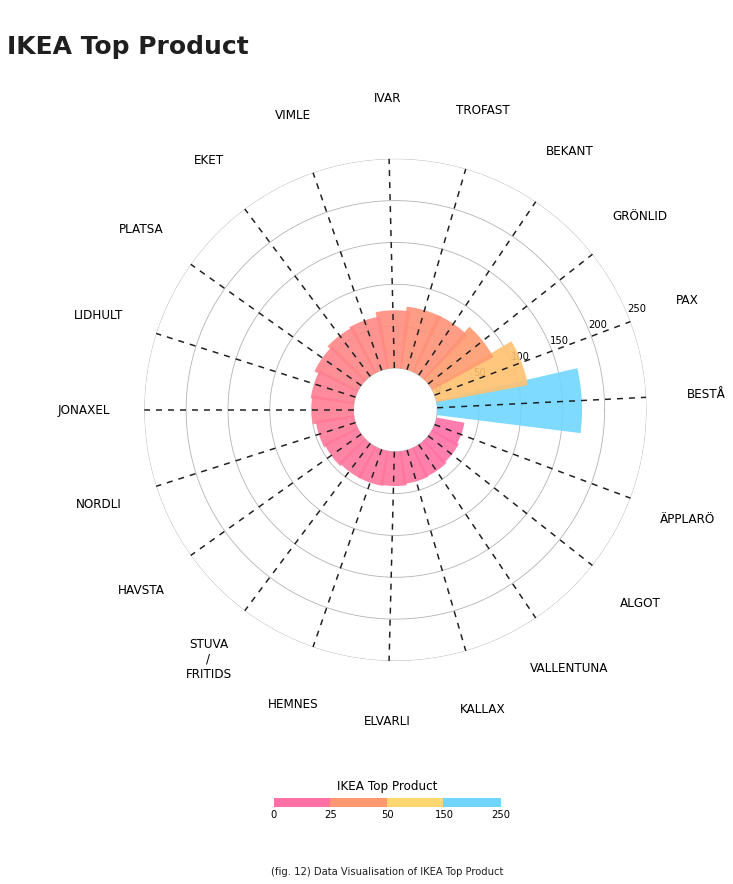

In [ ]:
# Prepare the graph (2) - Customize

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

#set axis
ax.set_ylim(-50, 250)

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.35, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

DES = ["\n".join(wrap(r, 5, break_long_words=False)) for r in SEL]
DES

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(DES, size=12);

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add extra space for the labels
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(50)

# Add legend
# Add extra space for legend
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 25, 50, 150, 250]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[0, 25, 50, 150, 250]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("IKEA Top Product", size=12, labelpad=-40)

# Add annotations 
# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.9)

# Define title, subtitle, and caption
title = "\nIKEA Top Product"

caption = "(fig. 12) Data Visualisation of IKEA Top Product"

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="center", va="baseline")
fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline")

### Bivariate Analysis

In [ ]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume,price_diff,diff_amount
0,90420332,FREKVENS,Bar furniture,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,99.0,51.0,237303.0,0,0.0
1,368814,NORDVIKEN,Bar furniture,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,47.0,105.0,80.0,394800.0,0,0.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,47.0,102.0,48.0,230112.0,0,0.0
3,80155205,STIG,Bar furniture,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,300000.0,0,0.0
4,30180504,NORBERG,Bar furniture,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,190920.0,0,0.0


#### Visualizing `price` vs `old_price`

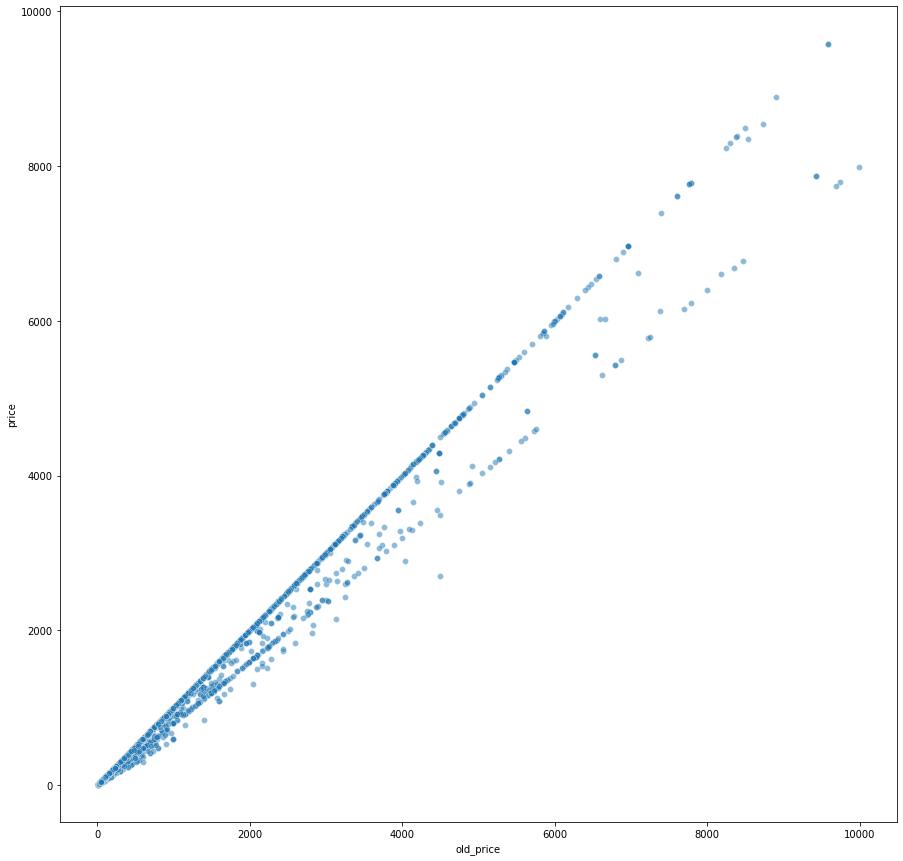

In [ ]:
# Create the scatterplot

plt.figure(figsize = (15,15))

sns.scatterplot(data=df, x="old_price", y="price", alpha = 0.5)

# (fig. 13)

There are linear connection between `price` and `old_price`, the higher the `price` the value of `old_price` also increase.

#### Visualizing `volume` [ the size of product ] vs `price`

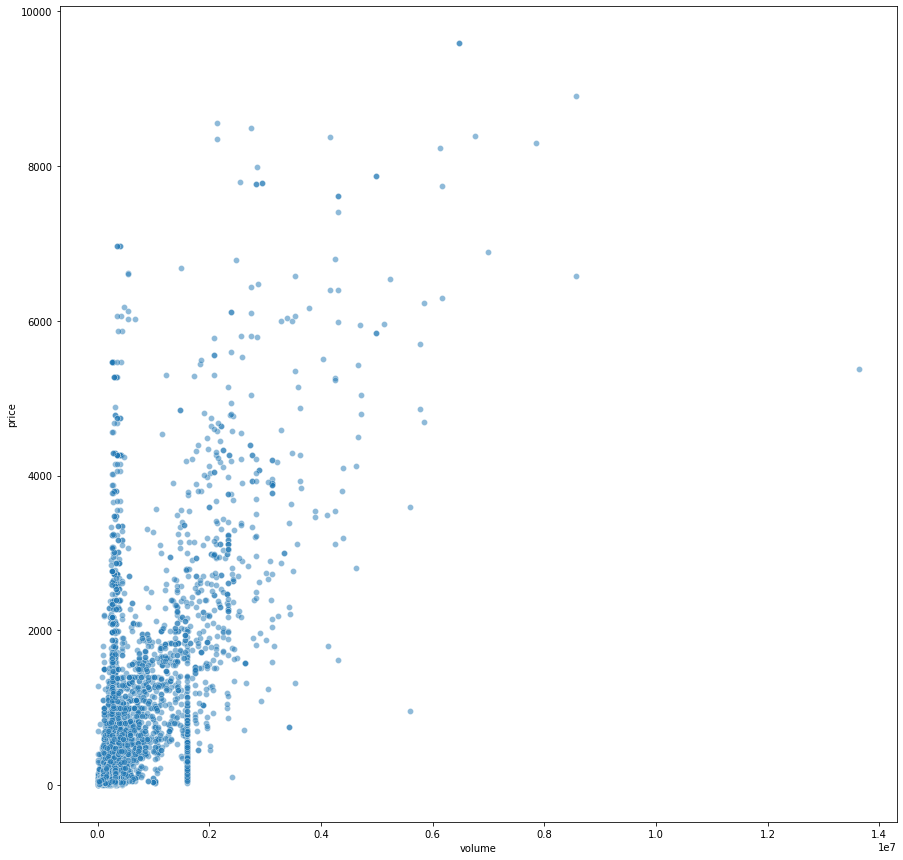

In [ ]:
# Scatterplot

plt.figure(figsize = (15,15))

sns.scatterplot(data=df, x="volume", y="price", alpha = 0.5)

# (fig. 15)

Based on above chart, product sold in IKEA is are dominated with small volume product with low price range.

#### Visualizing the `price` vs `category`

In [ ]:
# Create new dataframe category and price

cat_price = (df.groupby(['category'])['price'] 
            .agg(np.mean)
            .reset_index()
            .sort_values('price', ascending=False)
            )
cat_price

,category,price
16,Wardrobes,2162.141949
12,Sofas & armchairs,2004.016355
1,Beds,1647.432692
14,Tables & desks,1129.395425
11,"Sideboards, buffets & console tables",1068.086957
5,Chairs,1048.932640
10,Room dividers,932.000000
9,Outdoor furniture,859.826852
3,Cabinets & cupboards,789.015753
0,Bar furniture,679.553191


In [ ]:
cat_price['price'].mean()

941.756984154427

<function matplotlib.pyplot.show(*args, **kw)>

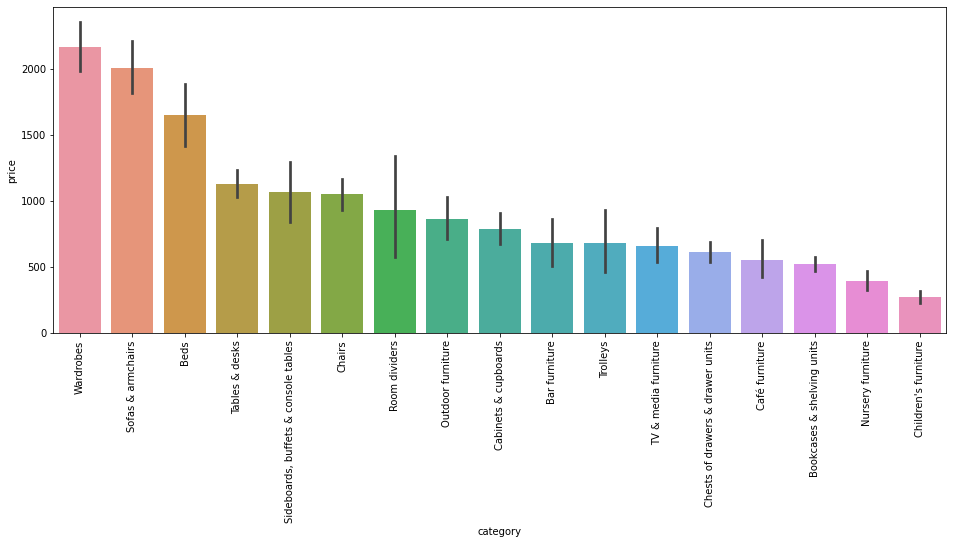

In [ ]:
# Visualizing category vs price

plt.figure(figsize=[16, 6])

sns.barplot(data=df, y='price', x='category', order=cat_price['category'])

plt.xticks(rotation=90)
plt.show

# (fig. 16)

Based on above chart, eventhough **wardrobe** is rank 6 from overall sales, it has the highest overall mean value on price than other.

#### Visualizing the `price_diff` vs `price`

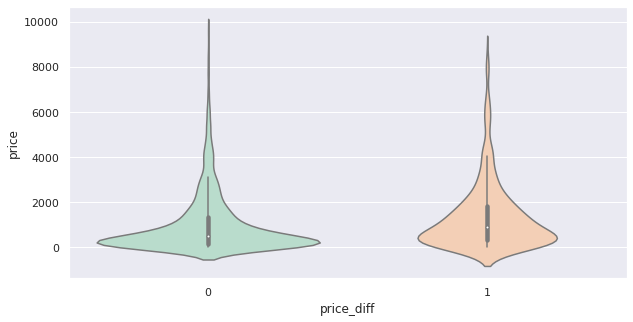

In [ ]:
plt.figure(figsize = (10,5))

sns.set(style="darkgrid")
sns.violinplot(x=df["price_diff"], y=df["price"], palette="Pastel2")

# (fig. 17)

**Explanation:**

Based on figure 17 above, product that has price difference between `price` and `old_price` has almost the same **median value** with product that doesn't has price differences. **Median value** also represent the highest probability value showed from the data.

#### Visualizing the `sellable_online` vs `price`

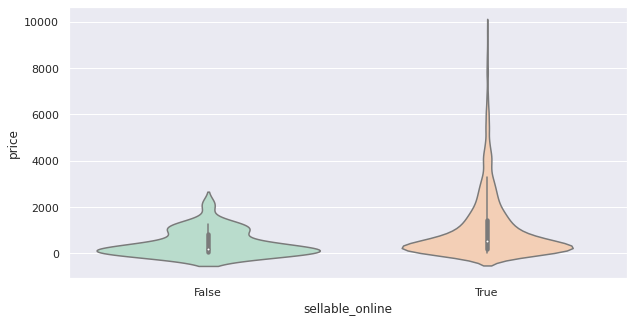

In [ ]:
plt.figure(figsize = (10,5))

sns.set(style="darkgrid")
sns.violinplot(x=df["sellable_online"], y=df["price"], palette="Pastel2")

# (fig. 18)

**Explanation:**

Based on figure above, product that available online or `sellable_online` tends to have higher product price probability than product that is not available online.

#### Visualizing the `other_colors` vs `price`

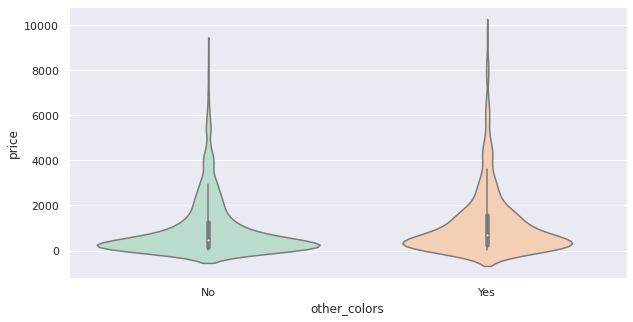

In [ ]:
plt.figure(figsize = (10,5))

sns.set(style="darkgrid")
sns.violinplot(x=df["other_colors"], y=df["price"], palette="Pastel2")

# (fig. 19)

**Explanation:**

Based on figure above, product that has other colors, has higher product price probability. Although there are only small price differences beween product with `other_colors` and not.

#### Visualizing the `category` vs `other_colors`

<function matplotlib.pyplot.show(*args, **kw)>

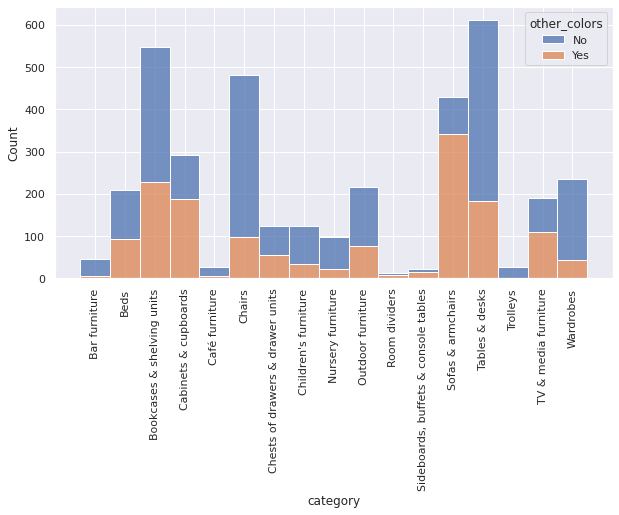

In [ ]:
plt.figure(figsize = (10,5))

sns.histplot(data = df,x= "category",hue = 'other_colors',multiple='stack')

plt.xticks(rotation=90)
plt.show

# (fig. 20)

#### Visualizing the `category` vs `sellable_online`

<function matplotlib.pyplot.show(*args, **kw)>

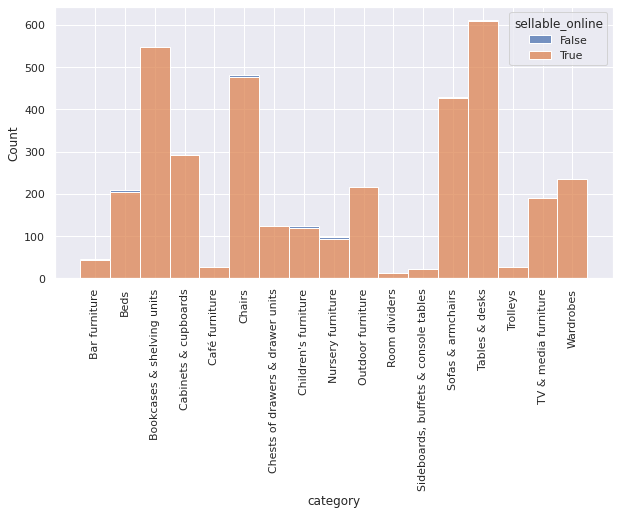

In [ ]:
plt.figure(figsize = (10,5))

sns.histplot(data = df,x= "category",hue = 'sellable_online',multiple='stack')

plt.xticks(rotation=90)
plt.show

# (fig. 21)

## MODELING

In [ ]:
df_numericals.head()

,item_id,price,old_price,depth,height,width,volume,price_diff,diff_amount
0,90420332,265.0,265.0,47.0,99.0,51.0,237303.0,0,0.0
1,368814,995.0,995.0,47.0,105.0,80.0,394800.0,0,0.0
2,9333523,2095.0,2095.0,47.0,102.0,48.0,230112.0,0,0.0
3,80155205,69.0,69.0,50.0,100.0,60.0,300000.0,0,0.0
4,30180504,225.0,225.0,60.0,43.0,74.0,190920.0,0,0.0


In [ ]:
df_categoricals.head()

,name,category,sellable_online,link,other_colors,short_description,designer
0,FREKVENS,Bar furniture,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen
1,NORDVIKEN,Bar furniture,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette
2,NORDVIKEN / NORDVIKEN,Bar furniture,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette
3,STIG,Bar furniture,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz
4,NORBERG,Bar furniture,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen


### Data Prepocessing

In [ ]:
# drop unused column : item_id, link, short description, old_price

df_numericals = df_numericals.drop(['item_id', 'old_price'], axis = 1)

In [ ]:
df_categoricals = df_categoricals.drop(['link', 'short_description'], axis = 1)

In [ ]:
# Encoding the df_categoricals, for modeling

from sklearn.preprocessing import LabelEncoder
col = list(df_categoricals)
df_categoricals[col] = df_categoricals[col].apply(LabelEncoder().fit_transform)
df_categoricals.head()

,name,category,sellable_online,other_colors,designer
0,123,0,1,0,333
1,387,0,0,0,163
2,390,0,0,0,163
3,493,0,1,1,189
4,380,0,1,0,310


In [ ]:
# combining between df_numericals with df_categoricals

df_update = pd.concat([df_categoricals, df_numericals], axis=1, join='inner')

In [ ]:
df_update.head()

,name,category,sellable_online,other_colors,designer,price,depth,height,width,volume,price_diff,diff_amount
0,123,0,1,0,333,265.0,47.0,99.0,51.0,237303.0,0,0.0
1,387,0,0,0,163,995.0,47.0,105.0,80.0,394800.0,0,0.0
2,390,0,0,0,163,2095.0,47.0,102.0,48.0,230112.0,0,0.0
3,493,0,1,1,189,69.0,50.0,100.0,60.0,300000.0,0,0.0
4,380,0,1,0,310,225.0,60.0,43.0,74.0,190920.0,0,0.0


In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df_update.drop(columns='price')
target = df_update[['price']]

# First splitting: pretrain and test
feature_price_pretrain, feature_price_test, target_price_pretrain, target_price_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_price_train, feature_price_validation, target_price_train, target_price_validation = train_test_split(feature_price_pretrain, target_price_pretrain, test_size=0.20, random_state=42)

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_price_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,name,1.092192
2,category,1.084486
3,sellable_online,1.016534
4,other_colors,1.108256
5,designer,1.035342
6,depth,2.482708
7,height,2.029916
8,width,3.393267
9,volume,6.521976
10,price_diff,1.561410


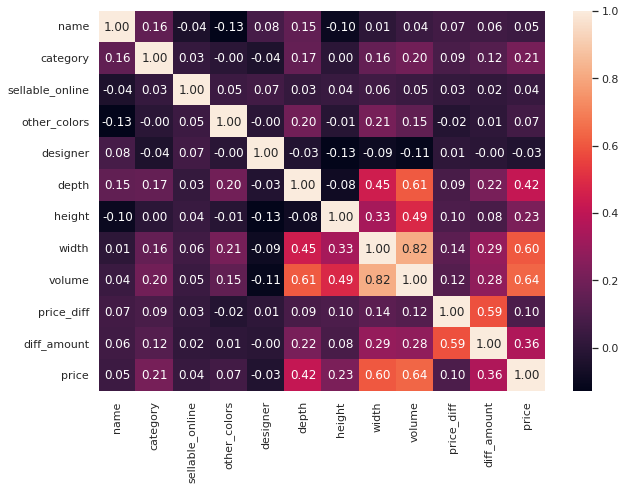

In [ ]:
# heatmap correlation
price_train = pd.concat([feature_price_train, target_price_train], axis=1)
corr = price_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Based on above heatmap, we choose to drop `width`, `height` and `depth`, and decided to keep `volume`. Column `volume` already represent product size and/or dimension.

In [ ]:
# drop redundant features
feature_price_train = feature_price_train.drop(columns=['width', 'height', 'depth'])
feature_price_validation = feature_price_validation.drop(columns=['width', 'height', 'depth'])
feature_price_test = feature_price_test.drop(columns=['width', 'height', 'depth'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_price_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,name,1.057368
2,category,1.073175
3,sellable_online,1.013317
4,other_colors,1.045568
5,designer,1.029042
6,volume,1.168960
7,price_diff,1.538380
8,diff_amount,1.642156


### RIDGE

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_price_train = feature_price_train.to_numpy()
y_price_train = target_price_train.to_numpy()
y_price_train = y_price_train.reshape(len(y_price_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_price_train, y_price_train)
ridge_reg_pointone.fit(X_price_train, y_price_train)
ridge_reg_one.fit(X_price_train, y_price_train)
ridge_reg_ten.fit(X_price_train, y_price_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_price_validation = feature_price_validation.to_numpy()
y_price_validation = target_price_validation.to_numpy()
y_price_validation = y_price_validation.reshape(len(y_price_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_price_validation)
    rmse = np.sqrt(mean_squared_error(y_price_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 987.252730825766
RMSE of Ridge regression model with alpha = 0.1 is 987.2517050840987
RMSE of Ridge regression model with alpha = 1.0 is 987.2418462723093
RMSE of Ridge regression model with alpha = 10 is 987.1705130199575


Ridge with `lambda/alpha value = 10` has the lowest RMSE value, so it is the **LAMBDA VALUE** 

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_price_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,97.781584
1,name,0.003576
2,category,21.064593
3,sellable_online,68.721860
4,other_colors,-58.972591
5,designer,0.692772
6,volume,0.000841
7,price_diff,-463.483432
8,diff_amount,2.067444


**EXPLANATION:**

Holding all other features is zero, the average product price is **97.781584**.

### LASSO

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_price_train = feature_price_train.to_numpy()
y_price_train = target_price_train.to_numpy()
y_price_train = y_price_train.reshape(len(y_price_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_price_train, y_price_train)
lasso_reg_pointone.fit(X_price_train, y_price_train)
lasso_reg_one.fit(X_price_train, y_price_train)
lasso_reg_ten.fit(X_price_train, y_price_train)

Lasso(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_price_validation = feature_price_validation.to_numpy()
y_price_validation = target_price_validation.to_numpy()
y_price_validation = y_price_validation.reshape(len(y_price_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_price_validation)
    rmse = np.sqrt(mean_squared_error(y_price_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 987.252465278707
RMSE of Lasso regression model with alpha = 0.1 is 987.2500761521387
RMSE of Lasso regression model with alpha = 1.0 is 987.2825197186934
RMSE of Lasso regression model with alpha = 10 is 987.5125295988878


In [ ]:
# Model Evaluation

lasso_best = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_price_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,71.844397
1,name,0.005163
2,category,21.085834
3,sellable_online,97.688536
4,other_colors,-60.026131
5,designer,0.691070
6,volume,0.000841
7,price_diff,-483.308350
8,diff_amount,2.093324


**EXPLANATION:**

Holding all other features is zero, the average product price is **71.844397**.

### Training Error Ridge


In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_price_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_price_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_price_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_price_train, y_predict_train)))

RMSE for training data is 998.6901837298269
MAE for training data is 654.1170892121919
MAPE for training data is 3.5985254264731696


In [ ]:
# Testing Error

# prepare prediction result on test data
X_price_test = feature_price_test.to_numpy()
y_predict_test = ridge_best.predict(X_price_test)

# ground truth target
y_price_test = target_price_test.to_numpy()
y_price_test = y_price_test.reshape(len(y_price_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_price_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_price_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_price_test, y_predict_test)))

RMSE for testing data is 1019.9781385549287
MAE for testing data is 654.3331930612878
MAPE for testing data is 4.249702968219504


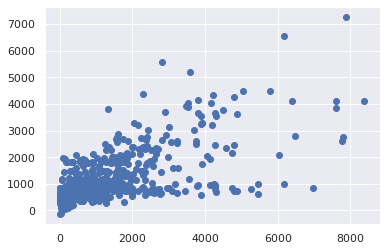

In [ ]:
plt.scatter(y_price_test,y_predict_test)

### Training Error Lasso

In [ ]:
# prepare prediction result on training data

y_predict_train = lasso_best.predict(X_price_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_price_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_price_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_price_train, y_predict_train)))

RMSE for training data is 998.6638772559531
MAE for training data is 654.4635527199952
MAPE for training data is 3.6049379799109906


In [ ]:
# prepare prediction result on test data

X_price_test = feature_price_test.to_numpy()
y_predict_test = lasso_best.predict(X_price_test)

# ground truth target

y_price_test = target_price_test.to_numpy()
y_price_test = y_price_test.reshape(len(y_price_test),)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_price_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_price_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_price_test, y_predict_test)))

RMSE for testing data is 1019.9710520387995
MAE for testing data is 654.9349302761653
MAPE for testing data is 4.263537130230902


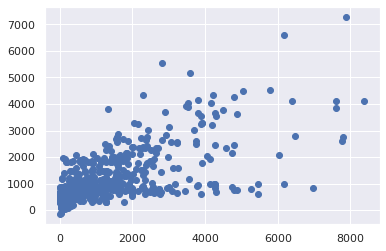

In [ ]:
plt.scatter(y_price_test,y_predict_test)

## SUPPORTING DATA

In this section we will try to do some small analysis based on **IKEA** yearly financial report, to find out what is the core problem for our modeling.

In [ ]:
# read ikea financial report resume csv

df_finance = pd.read_csv('/content/IKEA Financial Report.csv')

In [ ]:
df_finance

,Year,Sales_of_goods,Franchise_Fees,Cost_of_Good_Sold,Gross_Profit,Operational_Cost,Website_visit,Net_Income
0,2022,26148000000,1285000000,23404000000,4174000000,3140000000,4300000000,710000000
1,2021,24282000000,1273000000,21137000000,4478000000,2622000000,5000000000,1433000000
2,2020,22387000000,1162000000,18860000000,4753000000,2529000000,4000000000,1731000000
3,2019,23916000000,1195000000,20633000000,4551000000,2695000000,2800000000,1485000000
4,2018,23651000000,1200000000,20228000000,4691000000,2729000000,2500000000,1449000000
5,2017,20778000000,1156000000,18688000000,4190000000,2894000000,2300000000,912000000


In [ ]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               6 non-null      int64
 1   Sales_of_goods     6 non-null      int64
 2   Franchise_Fees     6 non-null      int64
 3   Cost_of_Good_Sold  6 non-null      int64
 4   Gross_Profit       6 non-null      int64
 5   Operational_Cost   6 non-null      int64
 6   Website_visit      6 non-null      int64
 7   Net_Income         6 non-null      int64
dtypes: int64(8)
memory usage: 512.0 bytes


**DATAFRAME EXPLANATION**
<br>

|       Column       |       Explanation       |
|--------------------|-------------------------|
|  `Year`   | Year of the annual report  |
|  `Sales of goods`       | Total Sales from goods / products |
|  `Franchise Fees`      | Franchise Fees |
|  `Cost of Good Sold` |  Direct costs of producing the goods sold by a company  [$] |
|  `Gross Profit`     | Profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services |
|  `Operational Cost`  | The ongoing expenses incurred from the normal day-to-day of running a business |
| `Website Visit`     | Total times customer visit **IKEA** website |
|  `Net Income`    | Net earnings, sales minus cost of goods sold, general expenses, taxes, and interest |

In [ ]:
df_fin1 = df_finance.drop(labels = ['Franchise_Fees','Gross_Profit','Website_visit', 'Operational_Cost', 'Net_Income'], axis = 1)
df_fin1.head()

,Year,Sales_of_goods,Cost_of_Good_Sold
0,2022,26148000000,23404000000
1,2021,24282000000,21137000000
2,2020,22387000000,18860000000
3,2019,23916000000,20633000000
4,2018,23651000000,20228000000


In [ ]:
df_fin2 = df_finance.drop(labels = ['Franchise_Fees','Gross_Profit','Website_visit', 'Sales_of_goods', 'Cost_of_Good_Sold'], axis = 1)
df_fin2.head()

,Year,Operational_Cost,Net_Income
0,2022,3140000000,710000000
1,2021,2622000000,1433000000
2,2020,2529000000,1731000000
3,2019,2695000000,1485000000
4,2018,2729000000,1449000000


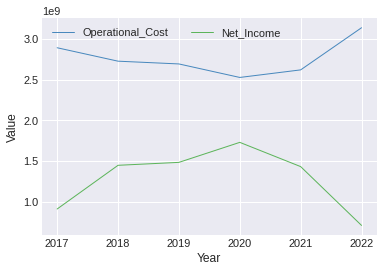

In [ ]:
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in df_fin2.drop('Year', axis=1):
    num+=1
    plt.plot(df_fin2['Year'], df_fin2[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.xlabel("Year")
plt.ylabel("Value")

# Show the graph
plt.show()

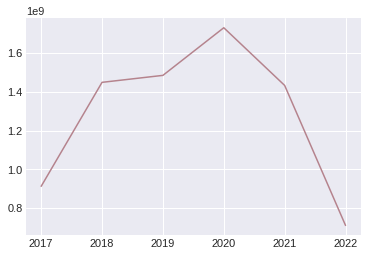

In [ ]:
# Draw plot
plt.plot( 'Year', 'Net_Income', data=df_finance, color='#b5838d')
plt.show()

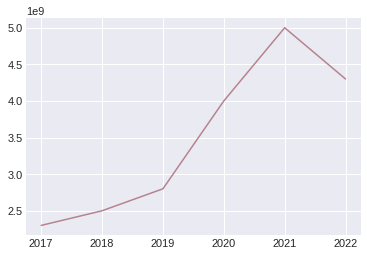

In [ ]:
# Draw plot
plt.plot( 'Year', 'Website_visit', data=df_finance, color='#b5838d')
plt.show()

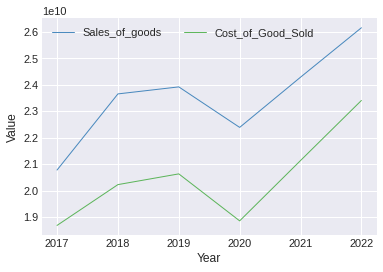

In [ ]:
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in df_fin1.drop('Year', axis=1):
    num+=1
    plt.plot(df_fin1['Year'], df_fin1[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.xlabel("Year")
plt.ylabel("Value")

# Show the graph
plt.show()